In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<ipython-input-7-8aa256208bf9>:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


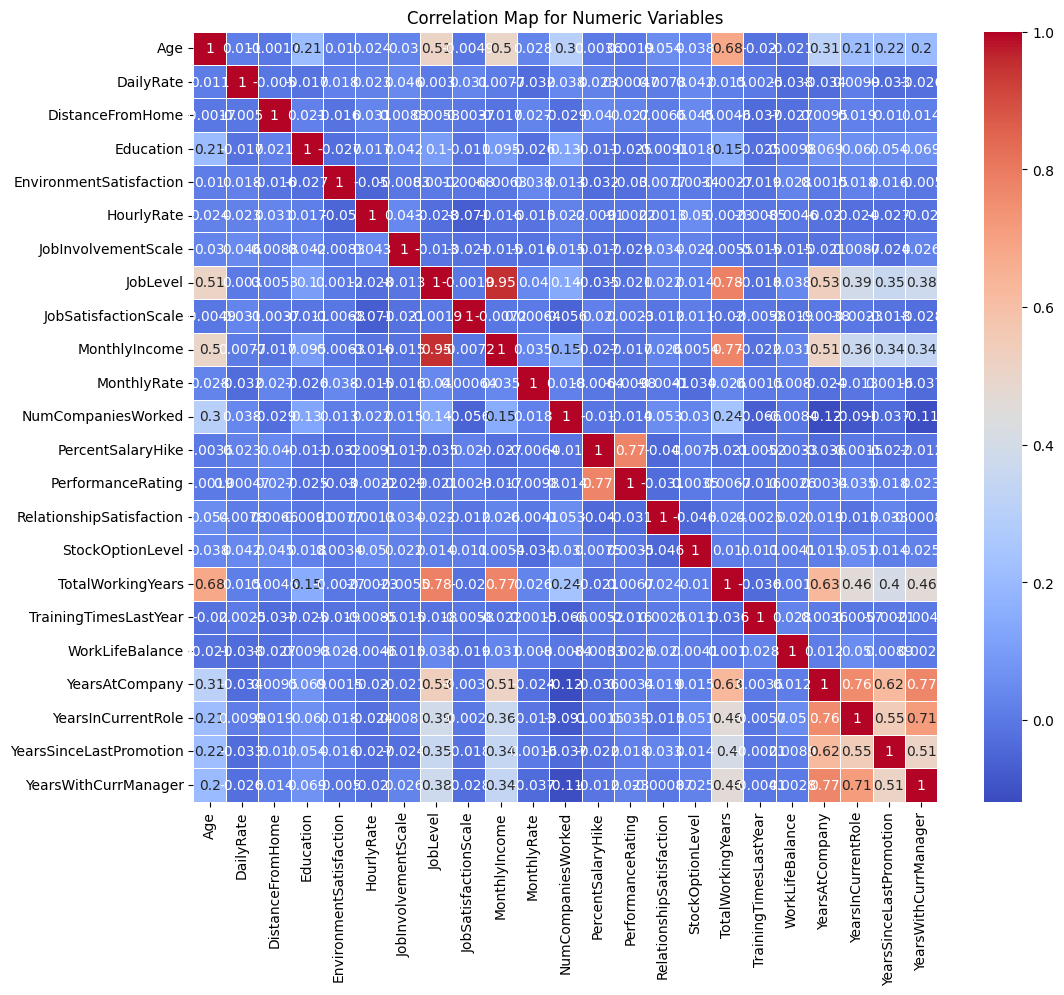

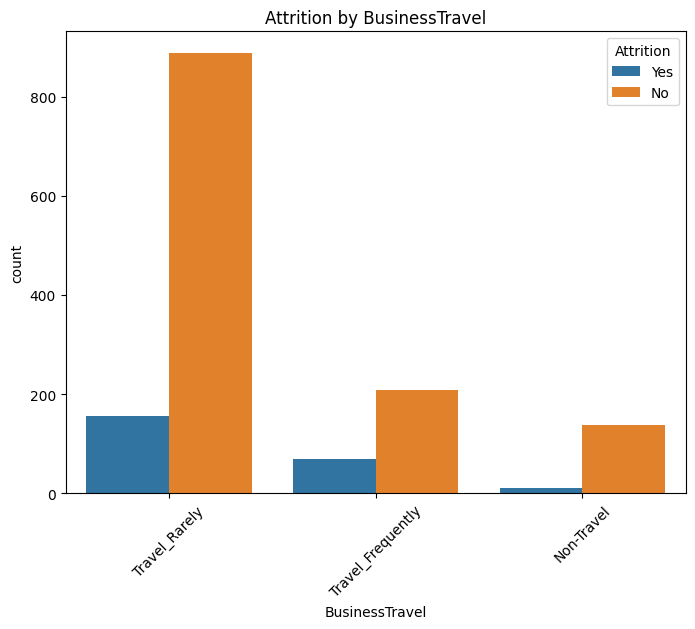

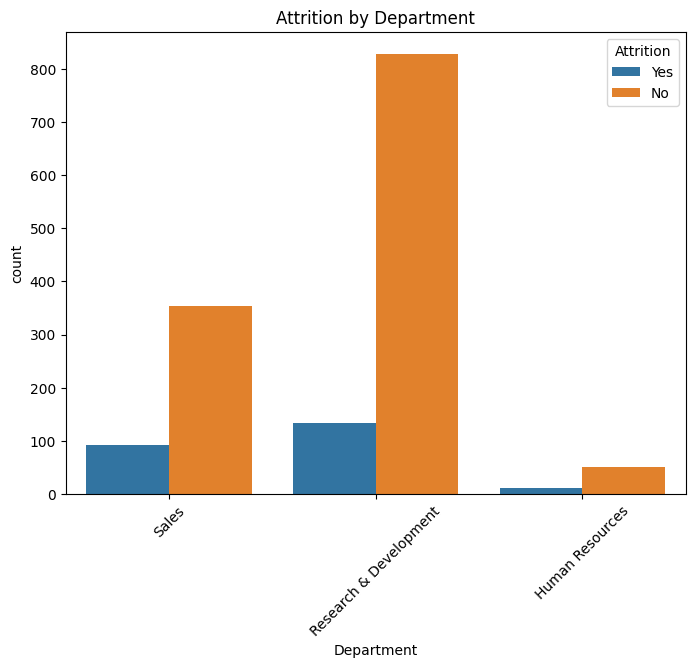

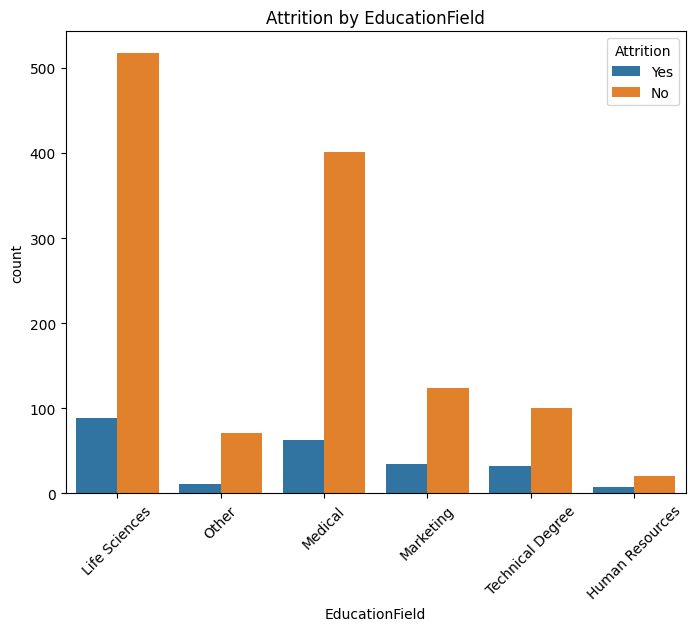

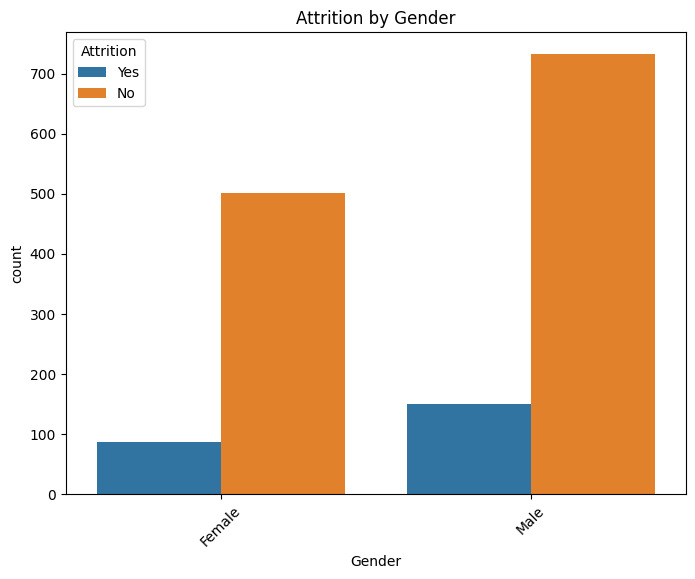

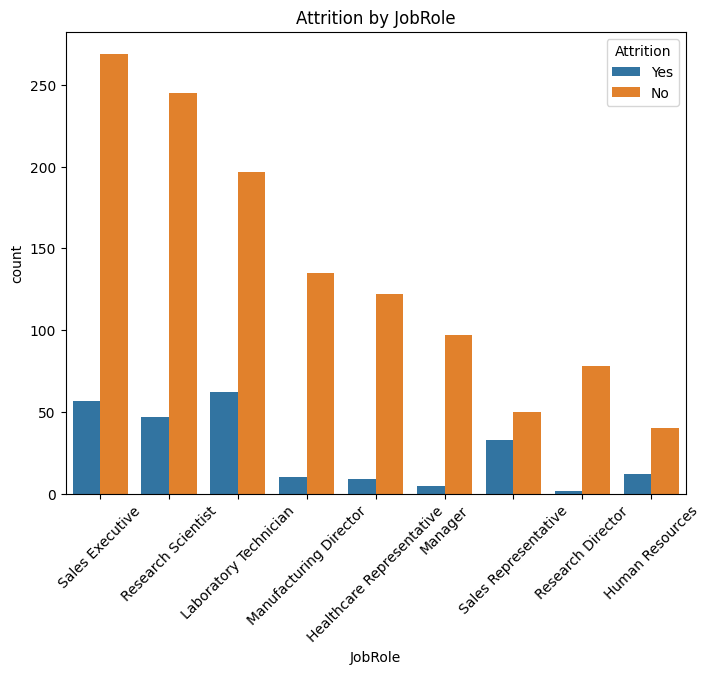

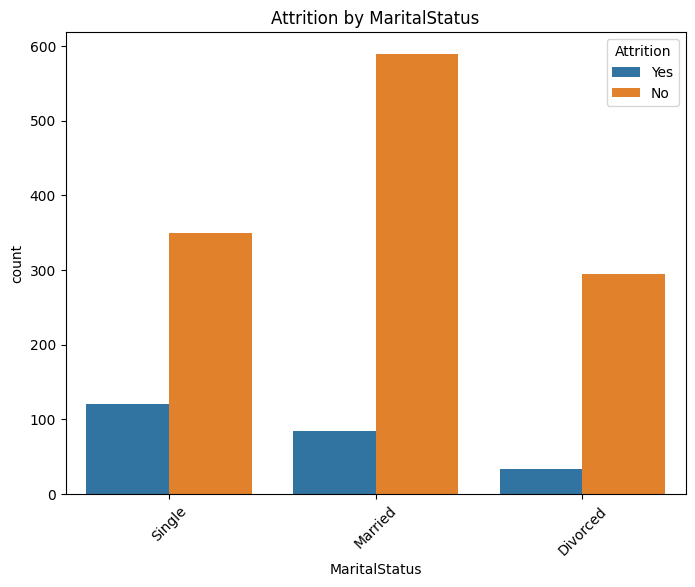

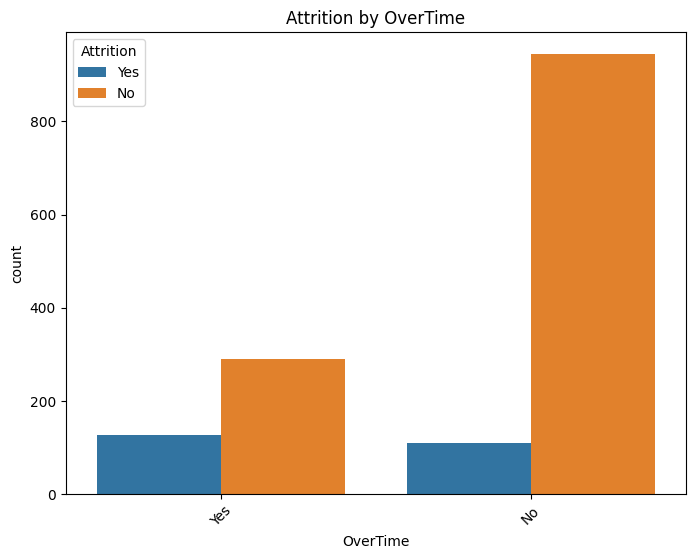

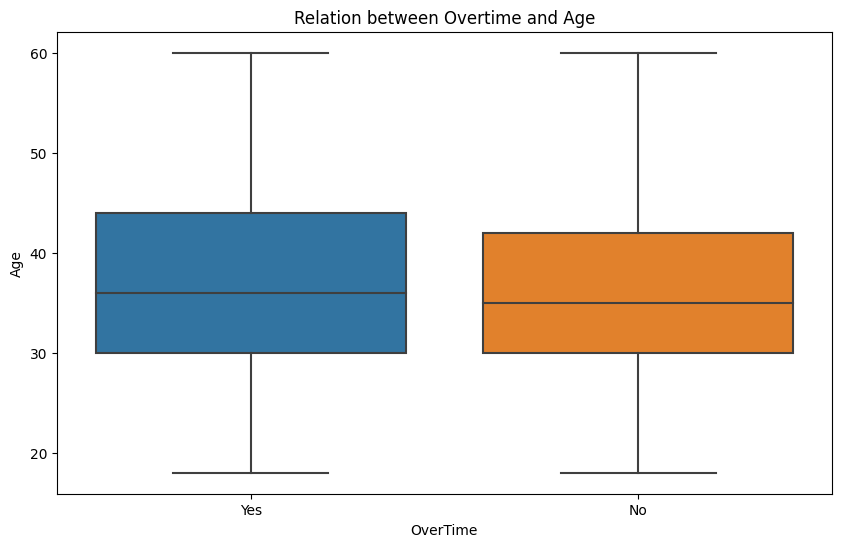

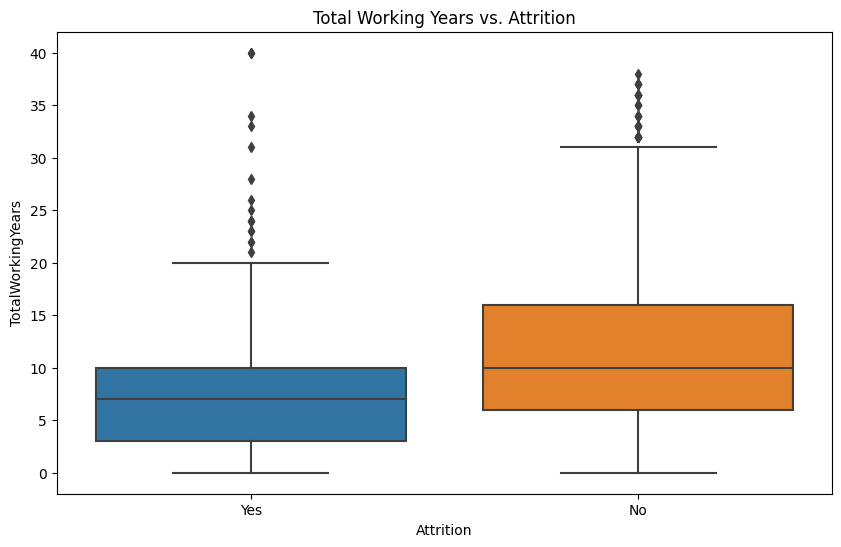

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





# Renaming columns
column_mapping = {
    'Age': 'Age',
    'Attrition': 'Attrition',
    'BusinessTravel': 'BusinessTravel',
    'DailyRate': 'DailyRate',
    'Department': 'Department',
    'DistanceFromHome': 'DistanceFromHome',
    'Education': 'Education',
    'EducationField': 'EducationField',
    'EnvironmentSatisfaction': 'EnvironmentSatisfaction',
    'Gender': 'Gender',
    'HourlyRate': 'HourlyRate',
    'JobInvolvement': 'JobInvolvement',
    'JobLevel': 'JobLevel',
    'JobRole': 'JobRole',
    'JobSatisfaction': 'JobSatisfaction',
    'MaritalStatus': 'MaritalStatus',
    'MonthlyIncome': 'MonthlyIncome',
    'MonthlyRate': 'MonthlyRate',
    'NumCompaniesWorked': 'NumCompaniesWorked',
    'OverTime': 'OverTime',
    'PercentSalaryHike': 'PercentSalaryHike',
    'PerformanceRating': 'PerformanceRating',
    'RelationshipSatisfaction': 'RelationshipSatisfaction',
    'StockOptionLevel': 'StockOptionLevel',
    'TotalWorkingYears': 'TotalWorkingYears',
    'TrainingTimesLastYear': 'TrainingTimesLastYear',
    'WorkLifeBalance': 'WorkLifeBalance',
    'YearsAtCompany': 'YearsAtCompany',
    'YearsInCurrentRole': 'YearsInCurrentRole',
    'YearsSinceLastPromotion': 'YearsSinceLastPromotion',
    'YearsWithCurrManager': 'YearsWithCurrManager'
}
df = df.rename(columns=column_mapping)

# Remove NaN values from the dataset
df = df.dropna()

# Data Visualization

# Correlation map for all numeric variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map for Numeric Variables')
plt.show()

# Visualization for categorical variables (e.g., Overtime, Marital Status, Job Role, Gender, etc.)

categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverTime', y='Age')
plt.title('Relation between Overtime and Age')
plt.show()

# Total Working Years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Total Working Years vs. Attrition')
plt.show()

# You can create similar plots for other numeric variables and customize the plots as needed.

# Additional visualizations can be added for other columns as needed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/dataset/HR-Employee-Attrition.csv')

# Data Cleaning

# Deleting redundant columns and dropping duplicates
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df = df.drop_duplicates()

# Data Visualization

# Plot a correlation map for all numeric variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map for Numeric Variables')
plt.show()

# Visualization for categorical variables (e.g., Overtime, Marital Status, Job Role, Gender, etc.)
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                       'JobRole', 'MaritalStatus', 'OverTime']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverTime', y='Age')
plt.title('Relation between Overtime and Age')
plt.show()

# Total Working Years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Total Working Years vs. Attrition')
plt.show()

# Additional Data Exploration and Transformation (Advanced Techniques)

# Visualize the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

# Visualize the distribution of Monthly Income
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyIncome', kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

# Advanced correlation analysis
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Advanced Correlation Map for Numeric Variables')
plt.show()

# Pairplot for numeric variables
sns.pairplot(df, hue='Attrition', diag_kind='kde')
plt.show()

# Explore other variables and relationships as needed.

# End of the code
